In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy import optimize

In [14]:
#optimize.anneal()

In [20]:
def sa(objective, area, iterations, step_size, temperature):
    # create initial point
    start_point = area[:, 0] + np.random.rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    # evaluate initial point
    start_point_eval = objective(start_point)
    # Assign previous and new solution to previous and new_point_eval variable 
    mia_start_point, mia_start_eval = start_point, start_point_eval
    outputs = []
    for i in range(iterations):
        # First step by mia
        mia_step = mia_start_point + np.random.randn( len( area ) ) * step_size  
        mia_step_eval = objective(mia_step)
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
      #Append the new values into the output list
            outputs.append(start_point_eval)
            print('Acceptance Criteria = %.8f' % mac," ",'iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.8f' % start_point_eval)
        difference = mia_step_eval - mia_start_eval
        t = temperature / float(i + 1)
        # calculate Metropolis Acceptance Criterion / Acceptance Probability
        mac = np.exp(-difference / t)
        # check whether the new point is acceptable 
        if difference < 0 or np.random.rand() < mac:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval
    return [start_point, start_point_eval, outputs]

In [21]:
def objective(step):
    return step[0] ** 2.0

In [22]:
np.random.seed(1)
# define the area of the search space
area = np.asarray([[-6.0, 6.0]])
temperature = 12
iterations = 1200
step_size = 0.1
# perform the simulated annealing search

start_point, output, outputs = sa(objective, area, iterations, step_size, temperature)

Acceptance Criteria = 0.76232386   iteration Number =  37   best_so_far =  [-0.95340594]   new_best = 0.90898289
Acceptance Criteria = 0.87732932   iteration Number =  39   best_so_far =  [-0.91563305]   new_best = 0.83838388
Acceptance Criteria = 1.44709574   iteration Number =  40   best_so_far =  [-0.85680363]   new_best = 0.73411246
Acceptance Criteria = 1.42797973   iteration Number =  41   best_so_far =  [-0.8221177]   new_best = 0.67587751
Acceptance Criteria = 1.22608031   iteration Number =  42   best_so_far =  [-0.68541443]   new_best = 0.46979294
Acceptance Criteria = 2.09273059   iteration Number =  43   best_so_far =  [-0.61804282]   new_best = 0.38197693
Acceptance Criteria = 1.16478118   iteration Number =  50   best_so_far =  [-0.42564785]   new_best = 0.18117609
Acceptance Criteria = 0.81413718   iteration Number =  66   best_so_far =  [-0.35632231]   new_best = 0.12696559
Acceptance Criteria = 1.74594576   iteration Number =  67   best_so_far =  [-0.33780667]   new_be

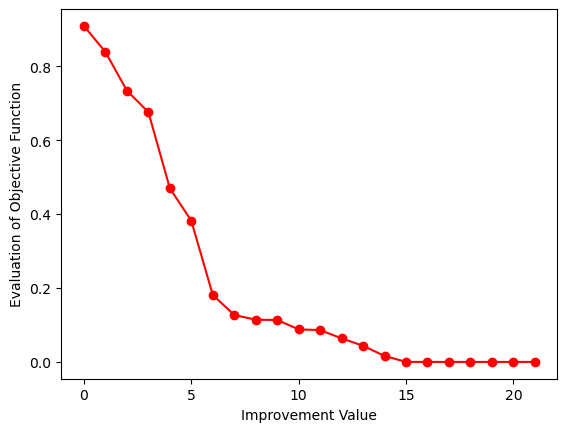

In [23]:
plt.plot(outputs, 'ro-')
plt.xlabel('Improvement Value')
plt.ylabel('Evaluation of Objective Function')
plt.show()

In [19]:
print(output)

1.1934539303385994e-08
